In [304]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
df = pd.read_csv('/Users/aidanastridge/Documents/GTAHPI.csv')
df['Date'] = pd.to_datetime(df['Date'], format = '%m/%d/%Y')
df['Composite_HPI'] = df['Composite_HPI'].astype(float)

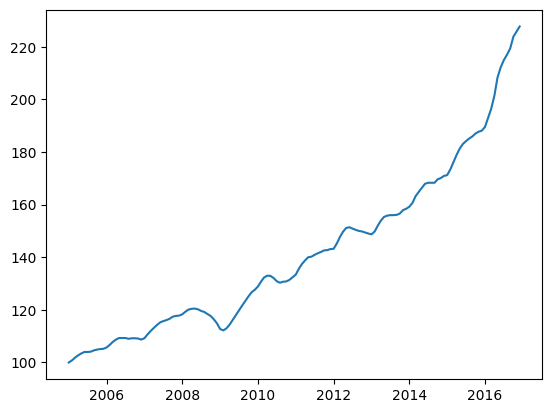

In [305]:
plt.plot(df['Date'],df['Composite_HPI'])

In [306]:
df['Composite_HPIlog'] = np.log(df['Composite_HPI'])
df['Composite_HPIlogdiff'] = df['Composite_HPIlog'].diff()


Log transformed and then first-order differenced

In [307]:
df

,Date,Composite_HPI,Composite_HPIlog,Composite_HPIlogdiff
0,2005-01-01,100.0,4.605170,NaN
1,2005-02-01,100.8,4.613138,0.007968
2,2005-03-01,101.8,4.623010,0.009872
3,2005-04-01,102.7,4.631812,0.008802
4,2005-05-01,103.4,4.638605,0.006793
...,...,...,...,...
139,2016-08-01,217.0,5.379897,0.009725
140,2016-09-01,219.4,5.390897,0.010999
141,2016-10-01,223.8,5.410753,0.019856
142,2016-11-01,225.8,5.419650,0.008897


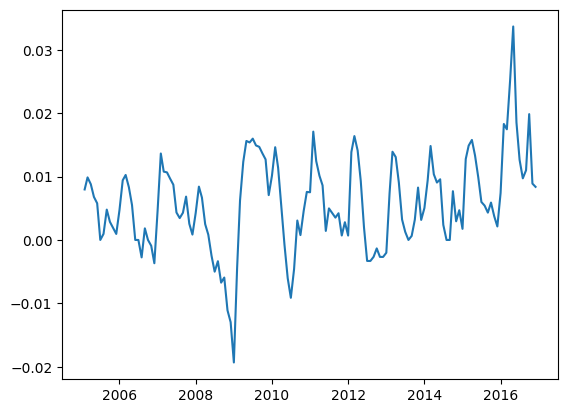

In [308]:
plt.plot(df['Date'], df['Composite_HPIlogdiff'] )

In [309]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


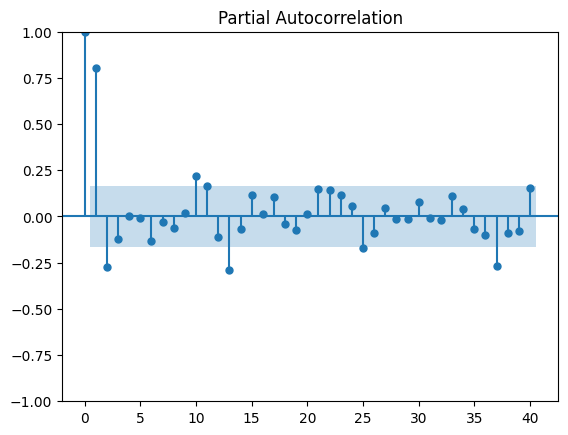

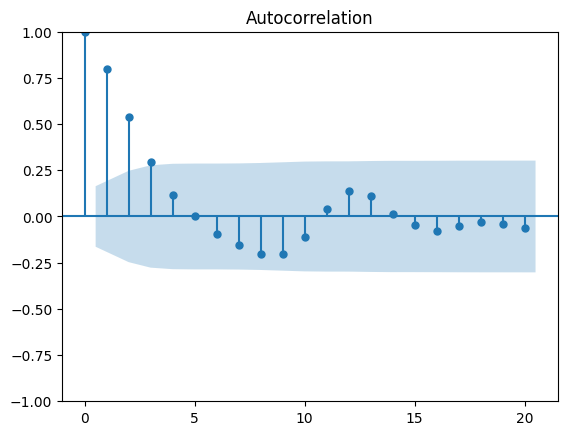

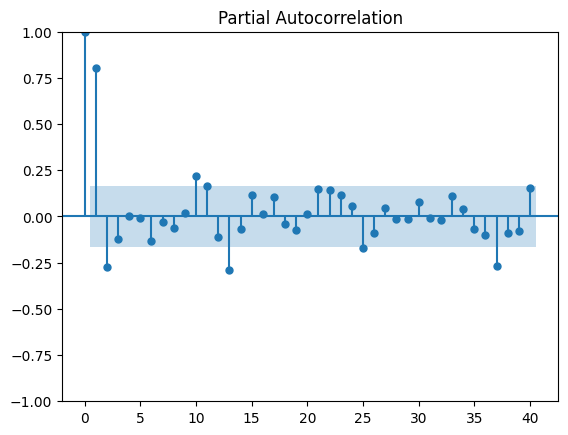

In [310]:
sm.graphics.tsa.plot_acf(df['Composite_HPIlogdiff'][1:],lags=20)
sm.graphics.tsa.plot_pacf(df['Composite_HPIlogdiff'][1:],lags=40)

AR(1) model?

In [311]:
model=ARIMA(df['Composite_HPIlogdiff'][1:],order=(1,0,0), seasonal_order=(0,0,0,12))
model_fit=model.fit()

In [312]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     Composite_HPIlogdiff   No. Observations:                  143
Model:                   ARIMA(1, 0, 0)   Log Likelihood                 571.486
Date:                  Mon, 24 Jul 2023   AIC                          -1136.973
Time:                          18:09:57   BIC                          -1128.084
Sample:                               0   HQIC                         -1133.361
                                  - 143                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0058      0.002      2.886      0.004       0.002       0.010
ar.L1          0.7983      0.034     23.378      0.000       0.731       0.865
sigma2      1.961e-05   2.31e-06      8.495      0.000    1.51e-05    2.41e-05
===================================================================================
Ljung-Box (L1) (Q):                   6.46   Jarque-Bera (JB):                 9.98
Prob(Q):                              0.01   Prob(JB):                         0.01
Heteroskedasticity (H):               1.89   Skew:                             0.62
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

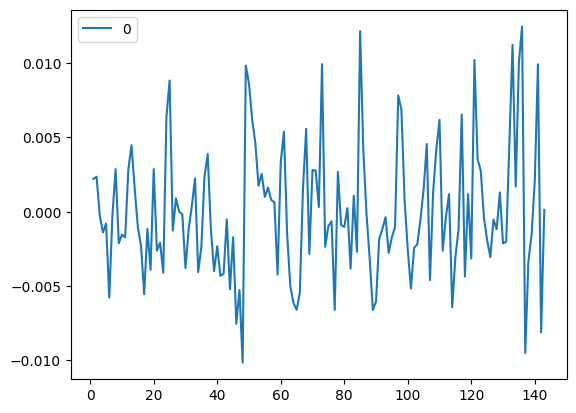

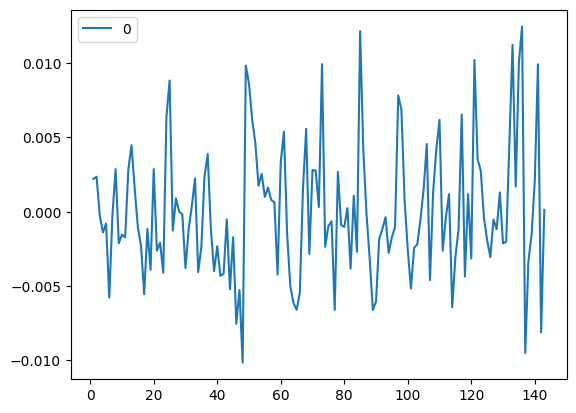

                0
count  143.000000
mean     0.000014
std      0.004450
min     -0.010141
25%     -0.002662
50%     -0.000646
75%      0.002373
max      0.012457


In [313]:
from matplotlib import pyplot
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot()
pyplot.show()
# summary stats of residuals
print(residuals.describe())

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


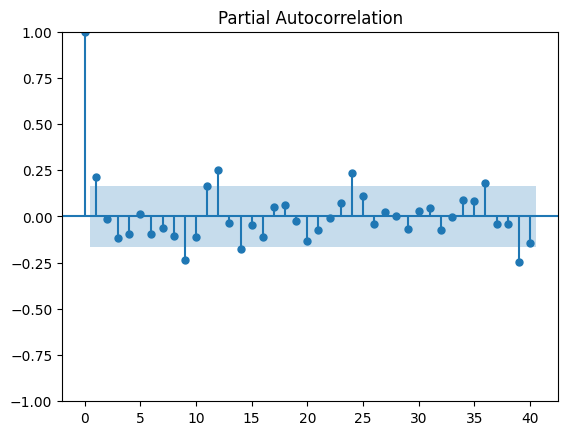

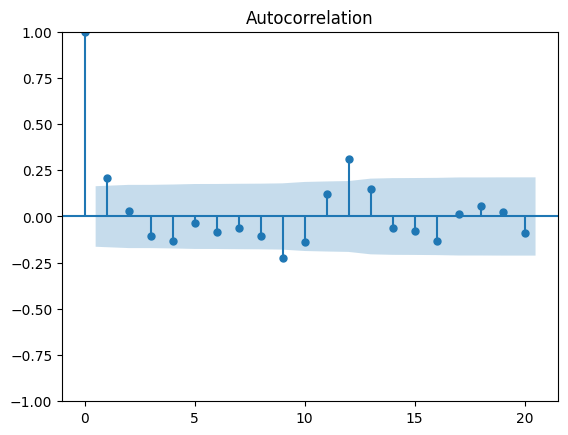

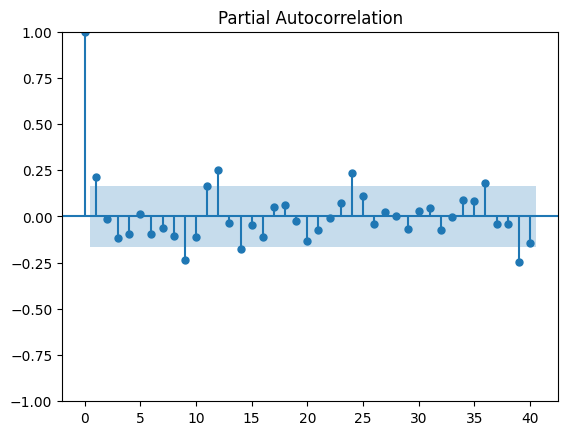

In [314]:
sm.graphics.tsa.plot_acf(model_fit.resid,lags=20)
sm.graphics.tsa.plot_pacf(model_fit.resid,lags=40)

In [ ]:
Stationary!

In [315]:
sm.stats.acorr_ljungbox(model_fit.resid, lags=[5], return_df=True)

,lb_stat,lb_pvalue
5,11.191492,0.047713


In [ ]:
Stationary!

In [331]:
print("Forecast for January 2017:",np.exp(model_fit.forecast(steps=1) + df['Composite_HPIlog'][143]).values)

Forecast for January 2017: [229.49455995]
